<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

#To evaluate the performance of a model
from sklearn.metrics import confusion_matrix

# to tune  models
from sklearn.model_selection import GridSearchCV

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To impute missing values
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

**Observation:**

All the libraries are imported successfully

## Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive') #Mount the drive

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv')  #Read a csv file located at the path
visa = df.copy()  #Create a copy of the Dataframe df and assign it to a variable visa
visa #Displays the dataframe


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Observation:**

Dataframe is displayed

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [5]:
visa.head(5)  #Displays first five rows of the dataframe

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Observation:**

1. Display the first 5 rows of the dataframe

In [6]:
visa.tail(5)  #Displays last five rows of the dataframe

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Observation:**

1. Display the last 5 rows of the dataframe

#### Understand the shape of the dataset

In [7]:
visa.shape  #shape will return rows & column of data frame

(25480, 12)

**Observation:**

Total number of rows & column present in dataframe are :

*   25480 rows
*   12 column





#### Check the data types of the columns for the dataset

In [8]:
visa.info()  # Info method, provide quick overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Obervation:

Following observation are made using data.info

1. There are total of 25480 rows and 12 column in the dataframe

2. There are no missing value present

3. Only two column (no_of_employees, yr_of_estab) have datatype int64

4. Only one column (prevailing_wage) have datatype float64

5. Rest all columns (case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, case_status) have datatype object

6. Memory usage is : 2.3+ MB

In [9]:
visa.isnull().sum()  #sum of null values per column

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Observations:**

Based on the output of the method, the data frame does not contain any missing values. The dataset is complete, with no missing values detected.

In [10]:
visa.duplicated().sum()  #Used to find and count the number of duplicate rows in the Dataframe

0

**Observation:**

Based on the output of the method, the data frame does not contain any duplicate values.

In [11]:
data = visa.drop('case_id', axis=1)  #Drop the column

Observation:

Here we are dropping "Case_id" column as it contains unique id. And it doesnot give any crucial information.

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [12]:
data.describe(include= 'all').T  # used to generate descriptive statistics of the dataframe (.T will transpose the dataframe, swapping rows and columns)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:

By using describe function  we can conlcude that:

1. There are a total of 6 unique continent. Out of that Asia in in the top list.

2. Education_of_employee, contains a total of 4 unique value

3. Has_job_experience has a total of 2 unique value i.e Yes & No.

4. Requires_job_training has a total of 2 unique value i.e Yes & No.

5. No_of_employees, data seems to be heavily right skewed, It has an average of 5667 employee, min of -26 employee, which ideally is not possible, which needs to be treated well, max value of 602069.

6. Year_of_establishment, shows that the mean year is 1979, max year is 2016. and almost 50% if the company establised in year 1997.

7. Region_of_employment, there are a total of 5 unique value for it.

8. Prevailing_wages, data seems to be right skewed, with mean of 74455, max of 319210.

9. Unit_of_wage, there are a total of 4 unique unit of wage.

10. full_time_position, there are 2 unique position

11. Case_status, there are two unique case status


#### Fixing the negative values in number of employees columns

In [13]:
print(f'There are {len(data[data["no_of_employees"] < 0])} rows with a negative value for no_of_employees')

There are 33 rows with a negative value for no_of_employees


**Observation:**

There are 33 rows in the dataset where the "no_of_employees" values are negative, which is not logically possible. This issue needs to be addressed before proceeding with further analysis.

In [14]:
# Calculate the median of 'no_of_employees' excluding negative values
median_employees = data[data['no_of_employees'] >= 0]['no_of_employees'].median()

# Replace negative values with the median
data.loc[data['no_of_employees'] < 0, 'no_of_employees'] = median_employees
print(f'After replacing the value there are {len(data[data["no_of_employees"] < 0])} rows with a negative value')

After replacing the value there are 0 rows with a negative value


**Observation:**

Upon replacing the negative values with the median, the dataset now contains no negative values.

#### Let's check the count of each unique category in each of the categorical variables

In [15]:
data.nunique() #counts the number of unique values in each column

,0
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7100
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4
full_time_position,2


Observation:

1. Continent has a total of 6 unique value.
2. Eductaion of employee has a total of 4 unique value.
3. Has job experience has a total of 2 unique value.
4. Require job training has a total of 2 unique value.
5. No of employees has a total of 7100 unique value.
6. Year of establishment has a total of 199 unique value.
7. Region of employment has a total of 5 unique value.
8. Prevailing wage has a total of 25454 unique value.
9. Unit of wage has a total of 4 unique value.
10. Full time position has a total of 2 unique value.
11. Case status has a total of 2 unique value.

In [16]:
# categorial columns
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

**Observation:**

We are printing number of count of each unique value


### Univariate Analysis

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Creating functions that will help us with further analysis.**

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Observation on No_of_Employee**

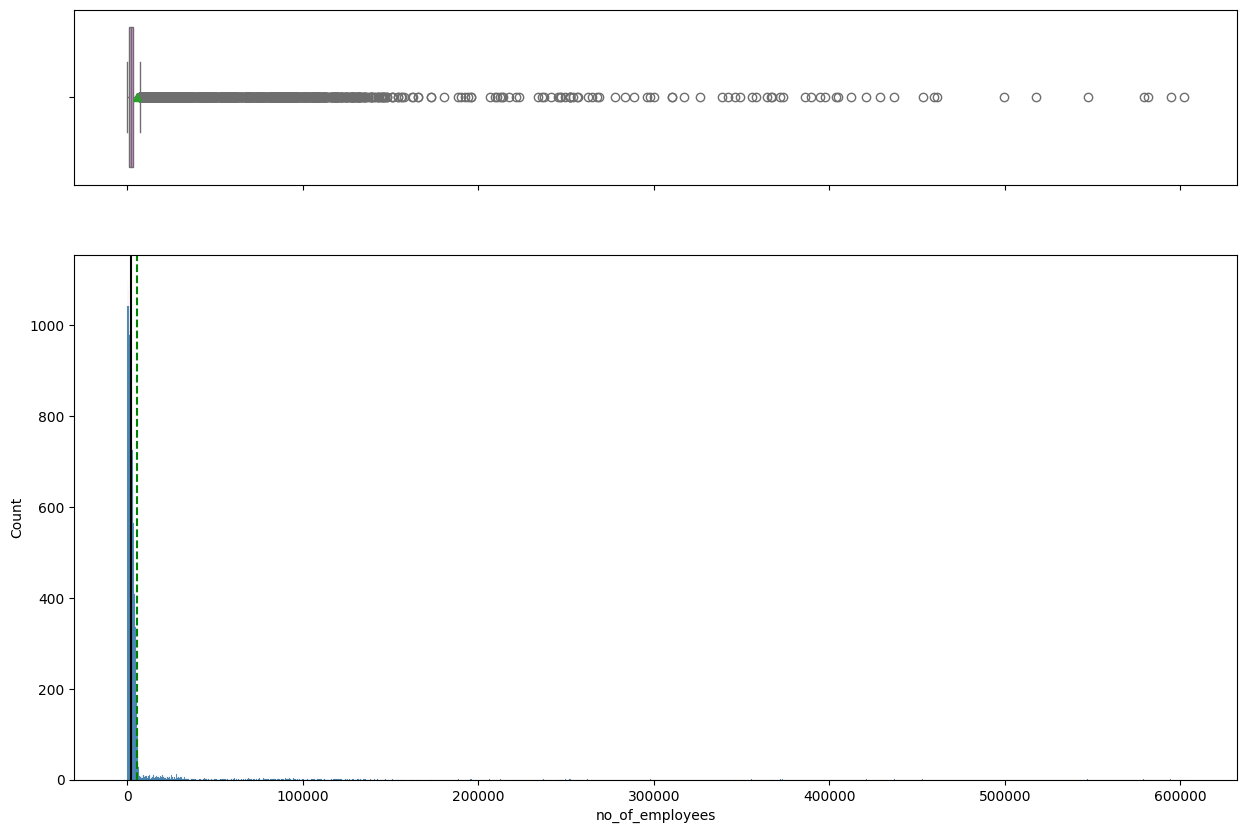

In [21]:
histogram_boxplot(data, "no_of_employees") #create and display a histogram and boxplot

**Observation:**

From the above graph we can conculde that:

Data is heavily right skewed.

**Observation on Year_of_Establishment**

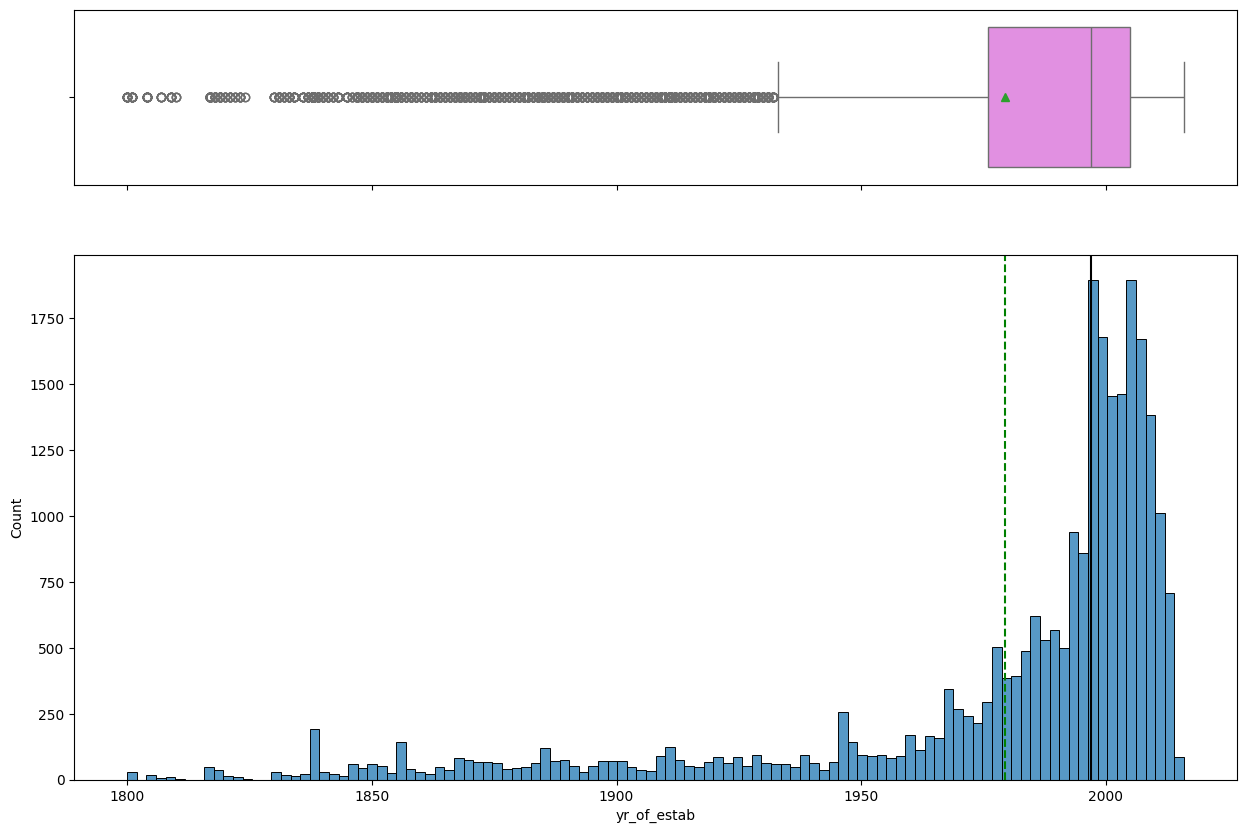

In [22]:
histogram_boxplot(data, "yr_of_estab") #create and display a histogram and boxplot

**Observation:**

"From the above graph, we can conclude that:

1. The data exhibits a left-skewed distribution, indicating that most values are concentrated toward the higher end of the range.

2. A significant number of companies began sponsoring visas in the late 1990s and early 2000s, highlighting a surge in visa sponsorship activity during that period."




**Observation on Prevailing Wage**

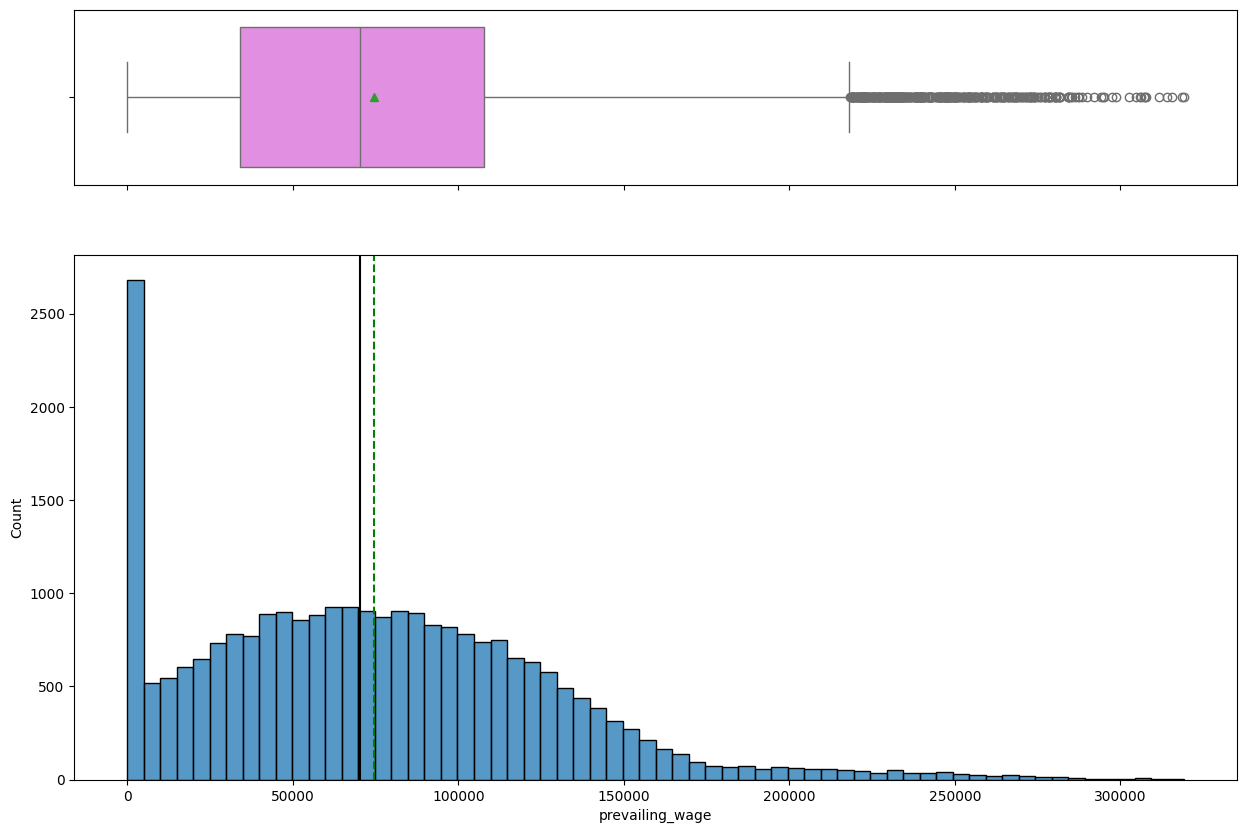

In [23]:
histogram_boxplot(data, "prevailing_wage") #create and display a histogram and boxplot

**Observation:**

"From the above graph, the following conclusions can be drawn:

1. The data exhibits a right-skewed distribution, indicating that most values are concentrated toward the lower end of the range.

2. The histogram reveals a concentration of prevailing wages in the lower to mid-range, suggesting that the majority of visa applicants are associated with jobs in this wage bracket.

3. The boxplot highlights the presence of outliers, which likely represent higher prevailing wages associated with more specialized roles. These outliers also imply that only a small number of visa applications are for such highly specialized jobs."


**Observation on Continent**

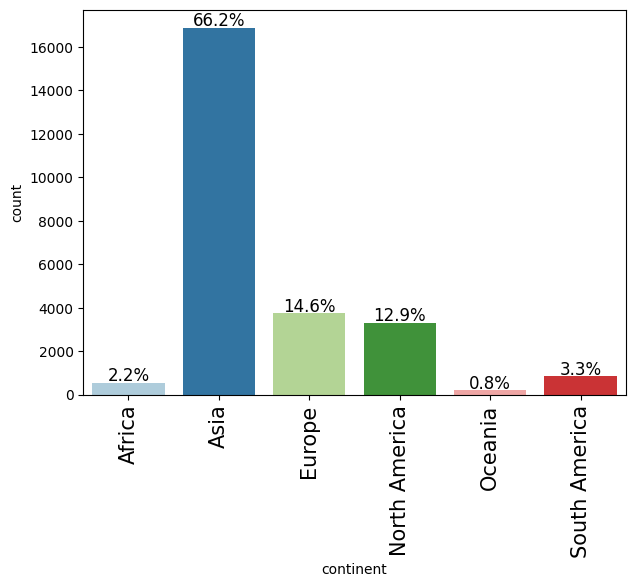

In [24]:
labeled_barplot(data, "continent", perc=True) #Display labeled barplot

**Observation:**

From the above graph we can conclude that:
1. Most of the people are coming from  Asia continent. which is 66.2% of the total.

2. Second is form Europe which is 14.6% of the total.

3. Only 0.8% people is coming from Oceania

4. From Africa 2.2% is coming.

5. South AMerica 3.3%

6. North AMerica 12.9%


**Observation on Full Time Position**

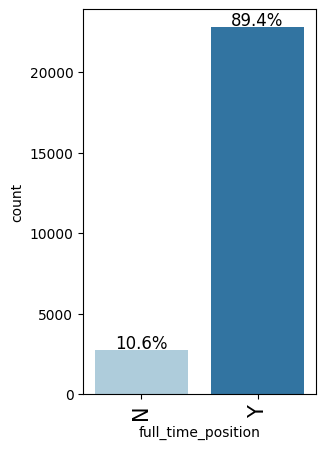

In [25]:
labeled_barplot(data, "full_time_position", perc=True) #Display labeled barplot

**Observation:**

"From the above graph, we can conclude that 89.4% of individuals are engaged in full-time employment, while only 10.6% are involved in part-time work. This demonstrates that the workforce is predominantly composed of full-time employees.

**Observation on Require Job Training**

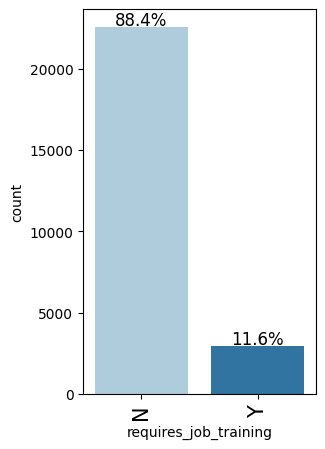

In [26]:
labeled_barplot(data, "requires_job_training", perc=True) #Dispaly labeled barplot

**Observation:**

"From the above graph, we can conclude that 11.6% of individuals require job training, while the remaining 88.4% do not need any job training. This indicates that the majority of the workforce is already equipped with the necessary skills for their roles."

**Observation on Unit of wage**

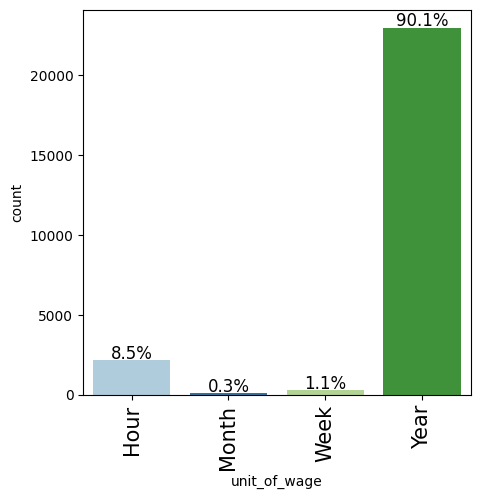

In [27]:
labeled_barplot(data, "unit_of_wage", perc=True) #create and display a labeled bar plot

**Observation:**

"From the above graph, we can observe the following distribution of wage types:

1. 90.1% of employees receive their wages on a yearly basis, making it the predominant wage type.

2. 8.5% are paid hourly, representing a smaller but notable portion.

3. 1.1% receive weekly wages, accounting for a minimal share.

4. 0.3% are paid monthly, making it the least common wage type."


#### Observations on education of employee

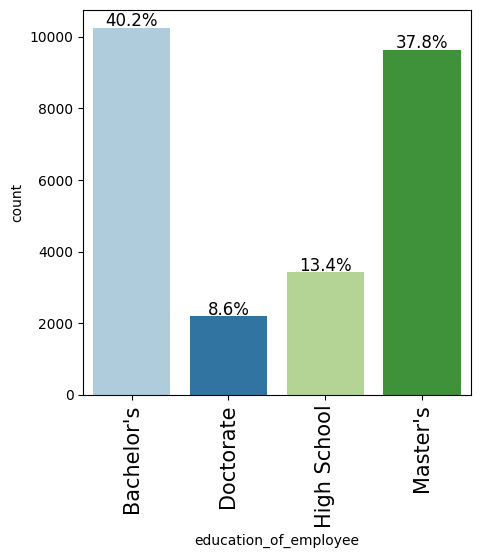

In [28]:
labeled_barplot(data, "education_of_employee", perc=True)  #create and display a labeled bar plot

**Observation:**

"Here is the distribution of educational qualifications:

1. 40.2% of individuals hold a Bachelor's degree, making it the most common qualification.

2. 37.8% possess a Master's degree, closely following behind.

3. 13.4% have only a High School education, representing a smaller segment.

4. 8.6% hold a Doctorate degree, the least represented category.

When ranked by percentage, the order of educational qualifications is: Bachelor's > Master's > High School > Doctorate."


#### Observations on region of employment

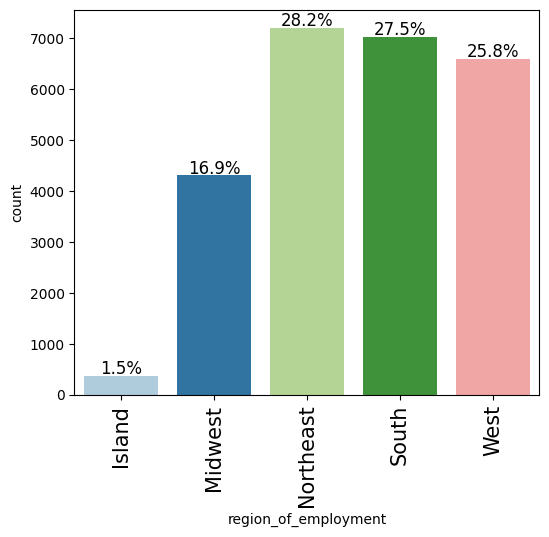

In [29]:
labeled_barplot(data, "region_of_employment", perc=True)  #create and display a labeled bar plot

**Observation:**

"Employment distribution across regions is as follows:

1. The Northeast region has the highest level of employment, accounting for 28.2% of the total.

2. The South region follows closely with 27.5% employment.

3. The West region ranks third, contributing 25.8% to the overall employment.

4. The Midwest region stands fourth with 16.9% employment.

5. The Island region has the smallest share, representing just 1.5% of employment."

#### Observations on job experience

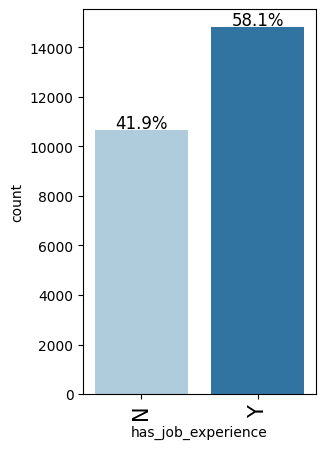

In [30]:
labeled_barplot(data, "has_job_experience", perc=True) #create and display a labeled bar plot

**Observation:**

"Out of the total employees, 58.1% have prior job experience, while the remaining 41.9% lack any previous work experience.

#### Observations on case status

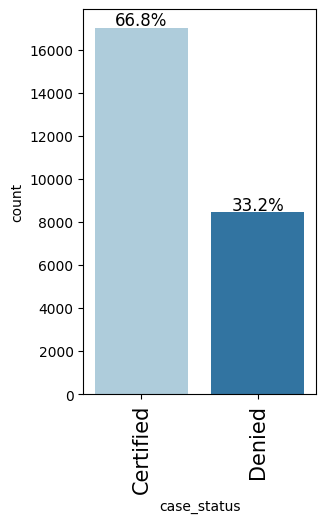

In [31]:
labeled_barplot(data, "case_status", perc=True) #create and display a labeled bar plot

**Observation:**

"Out of the total applicants, 66.8% have their visas certified, while the remaining 33.2% face visa denial. This highlights that nearly one-third of the applications are not successful in obtaining approval."

### Bivariate Analysis

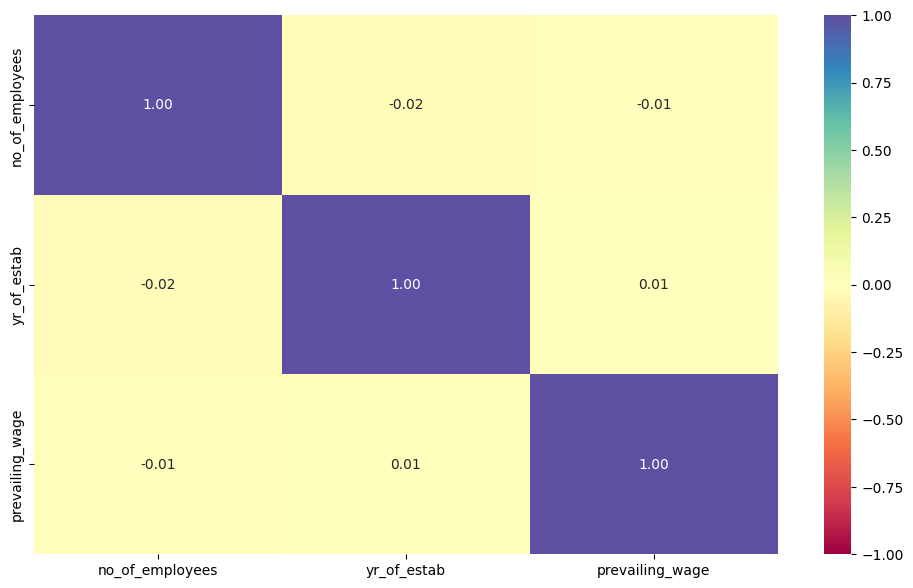

In [32]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**

"The Heatmap analysis indicates that there is no significant correlation between the variables 'no_of_employees,' 'year_of_establishment,' and 'prevailing_wage.' These features appear to be independent and do not exhibit any meaningful relationship with one another.

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


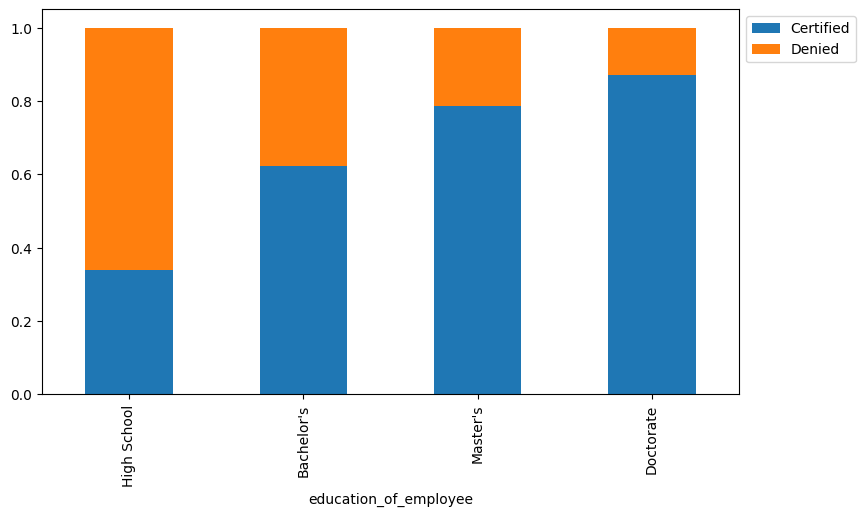

In [33]:
stacked_barplot(data, "education_of_employee", "case_status") #create and display a stacked bar plot

**Observation:**

"From the analysis of the graph, we can conclude:

1. Higher education levels correlate with higher visa certification rates. Applicants with a Doctorate degree have the lowest percentage of visa denials.

2. High school graduates face the highest rate of visa denials, making them the most vulnerable group.

3. Applicants with a Bachelor's degree rank second in terms of visa denial rates.

4. Those with a Master's degree follow third in the likelihood of visa denials.

Thus, the order of visa denial rates is: High School > Bachelor's > Master's > Doctorate, emphasizing the significant impact of educational qualifications on visa approval outcomes."




#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


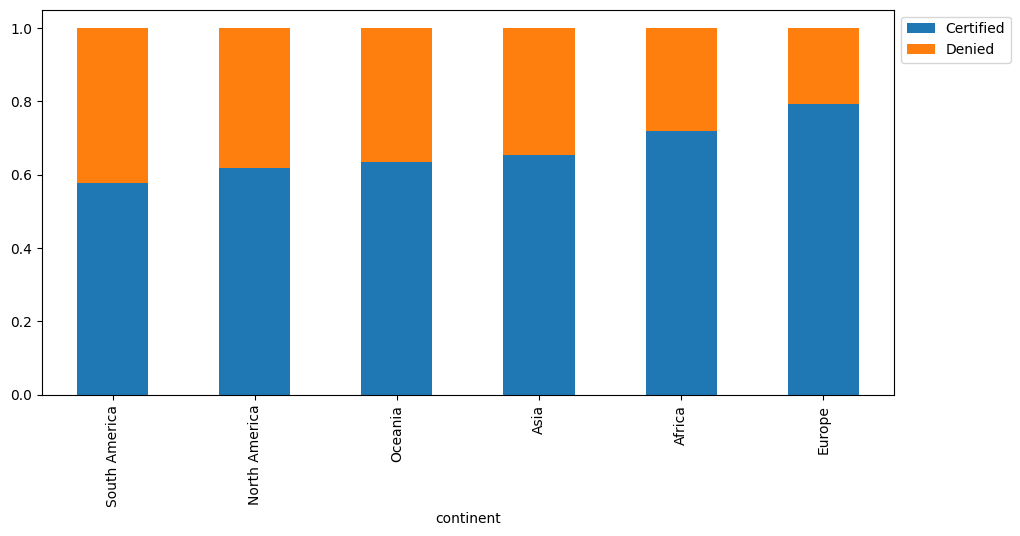

In [34]:
stacked_barplot(data, "continent", "case_status")  #create and display a stacked bar plot

**Observation:**

"From the analysis of the graph, we can conclude the following:

1. Visa denials are least common in Europe, followed closely by Africa.

2. Asia ranks third among the six continents in terms of visa denial rates.

3. South America experiences the highest number of visa denials, accounting for a significant proportion of rejected applications."


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


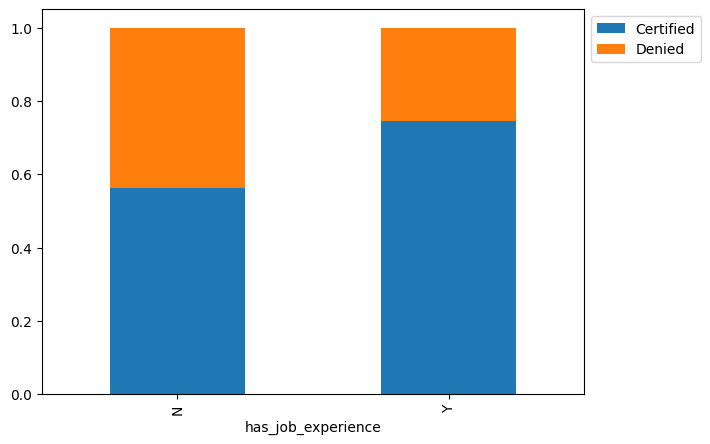

In [35]:
stacked_barplot(data, "has_job_experience", "case_status") #create and display a stacked bar plot

**Observation:**

1. "Applicants with prior job experience are significantly less likely to face visa rejection compared to those without any previous work experience, highlighting the positive impact of professional experience on visa approval rates."


#### Checking if the prevailing wage is similar across all the regions of the US

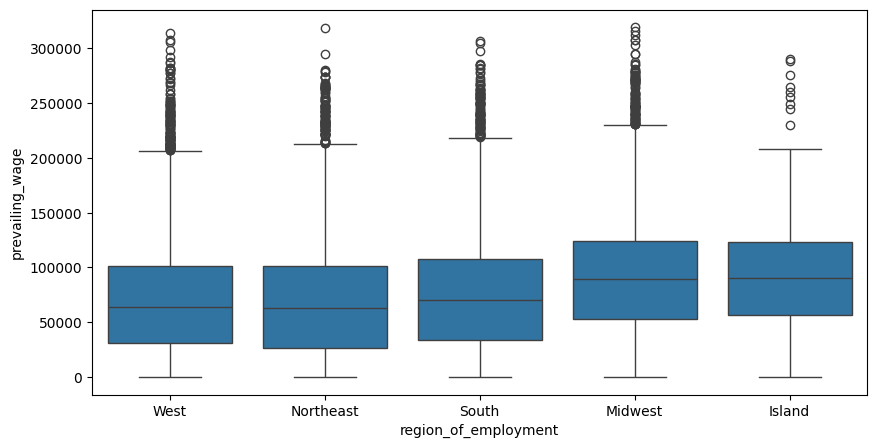

In [36]:
plt.figure(figsize=(10, 5))  # creates a new figure with given width and height
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")  # boxplot will be created
plt.show() #display the plot

**Observation:**

"The analysis reveals the following regional insights regarding prevailing wages:

1. The Midwest and Island regions exhibit slightly higher prevailing wages compared to other areas.

2. West and Northeast regions show almost identical levels of prevailing wages.

3. In the South region, prevailing wages are moderately higher than those in the West and Northeast but remain lower than in the Midwest and Island regions."


#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

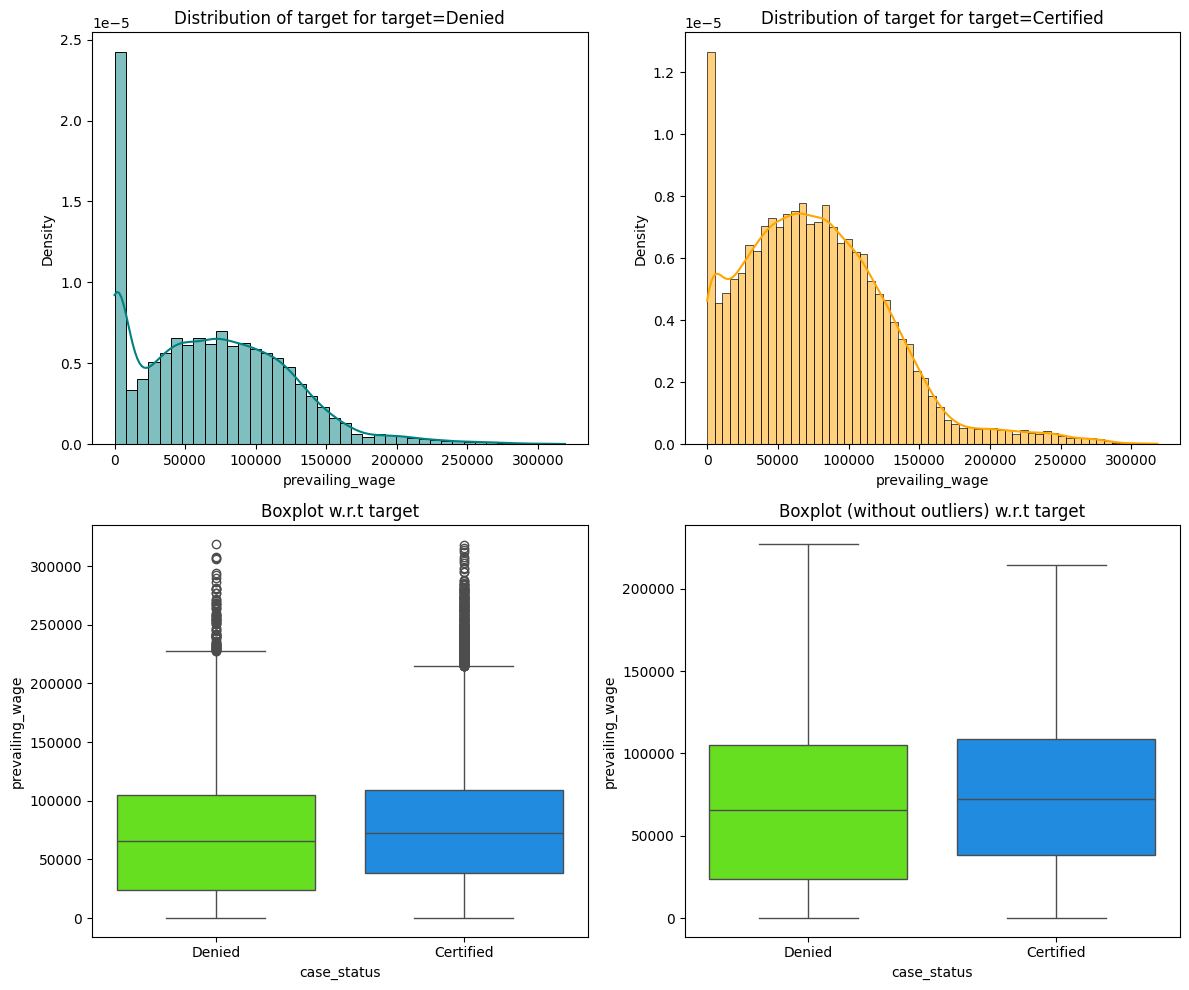

In [37]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status") #Create and visualize plot like histogram , boxplot

**Observation:**

"From the analysis of the graph, we can deduce the following:

1. Higher prevailing wages are strongly correlated with increased visa approval rates.

2. Lower prevailing wages significantly elevate the likelihood of visa denial.

3. This highlights that prevailing wage plays a crucial role in the visa certification process."



#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


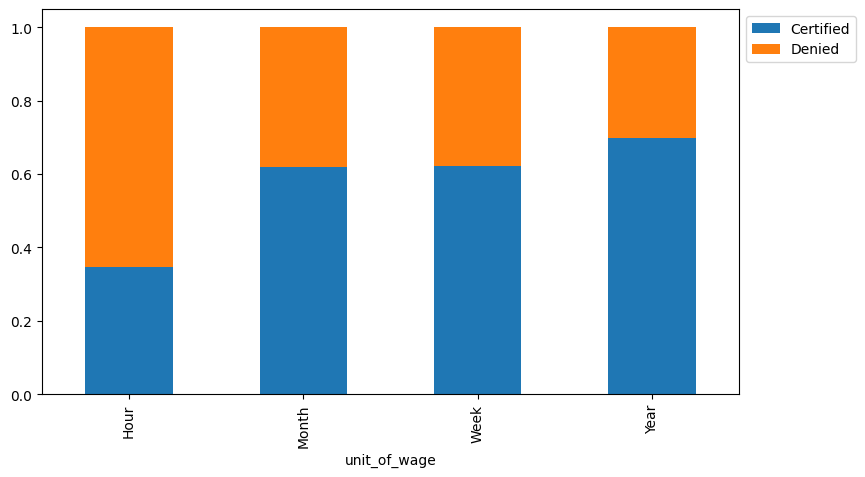

In [38]:
stacked_barplot(data, 'unit_of_wage', 'case_status') #create and display a stacked bar plot

Observation:

"Based on the graph, we can infer the following insights:

1. Applicants receiving wages on an hourly basis are more likely to have their visa applications denied.

2. Applicants receiving wages on a yearly basis have a significantly higher likelihood of their visa applications being approved or certified.

3. Applicants receiving wages on a weekly or monthly basis exhibit nearly equal chances of visa approval and denial."

## Data Pre-processing

### Outlier Check

In [39]:
#Outliers detection in No_of_employees
Q1 = data['no_of_employees'].quantile(0.25) #calculates first quartile Q1 which is 25% of data
Q3 = data['no_of_employees'].quantile(0.75) #calculates third quartile Q3 which is 75% of data
IQR = Q3 - Q1  #Calculate IQR
upper_bound = Q3 + 1.5 * IQR #calculates upper bound for outlier detection
lower_bound = Q1 - 1.5 * IQR #calculates lower bound for outlier detection
outliers = data[(data['no_of_employees'] < lower_bound) | (data['no_of_employees'] > upper_bound)] #identify outliers
print("Number of outliers in No_of_employees:", len(outliers)) #print outliers

Number of outliers in No_of_employees: 1556


In [40]:
#Outliers detection in yr_of_estab
Q1 = data['yr_of_estab'].quantile(0.25) #calculates first quartile Q1 which is 25% of data
Q3 = data['yr_of_estab'].quantile(0.75) #calculates third quartile Q3 which is 75% of data
IQR = Q3 - Q1  #Calculate IQR
upper_bound = Q3 + 1.5 * IQR #calculates upper bound for outlier detection
lower_bound = Q1 - 1.5 * IQR #calculates lower bound for outlier detection
outliers = data[(data['yr_of_estab'] < lower_bound) | (data['yr_of_estab'] > upper_bound)] #identify outliers
print("Number of outliers in Year_of_estab:", len(outliers)) #print outliers

Number of outliers in Year_of_estab: 3260


In [41]:
#Outliers detection in prevailing_wage
Q1 = data['prevailing_wage'].quantile(0.25) #calculates first quartile Q1 which is 25% of data
Q3 = data['prevailing_wage'].quantile(0.75) #calculates third quartile Q3 which is 75% of data
IQR = Q3 - Q1  #Calculate IQR
upper_bound = Q3 + 1.5 * IQR #calculates upper bound for outlier detection
lower_bound = Q1 - 1.5 * IQR #calculates lower bound for outlier detection
outliers = data[(data['prevailing_wage'] < lower_bound) | (data['prevailing_wage'] > upper_bound)] #identify outliers
print("Number of outliers in prevailing_wage:", len(outliers)) #print outliers

Number of outliers in prevailing_wage: 427


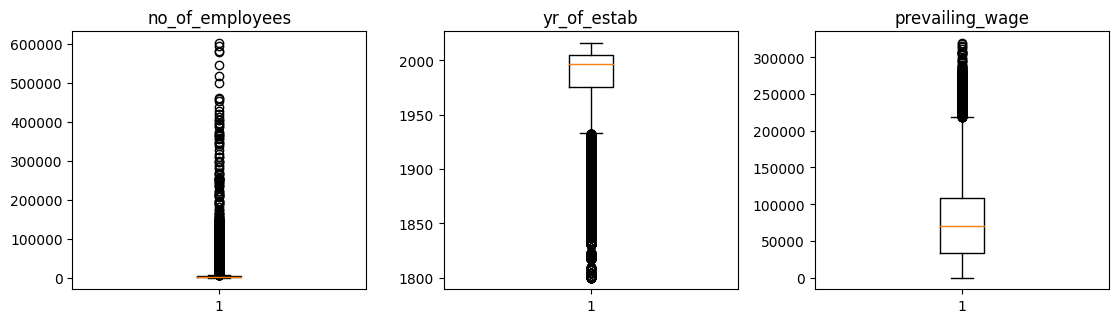

In [42]:
# Create box plots for numerical columns
numerical_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**

"Based on the analysis, we observe a significant presence of outliers in the variables 'No_of_employee,' 'Year_of_establishment,' and 'Prevailing_wage.' Removing such a large volume of data could result in a biased model during training, as it may eliminate valuable variations or patterns inherent in the dataset. Therefore, it is essential to retain these outliers to ensure that the model reflects the true characteristics of the data."

### Data Preparation for modeling

In [43]:
data["case_status"].value_counts()  #Calculate number of times each distinct value appear in that column

,case_status
Certified,17018
Denied,8462


**Observation:**

Our Traget variable i.e Case-status has a total of certified count as 17018 and denied count as 8462

In [44]:
# encode case status, where certified is 1, denied is 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [45]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"]



In [46]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [47]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


**Observation:**

1. Training data set has total 15288 rows & 10 column.

2. Validation data set has total of 5096 rows & 10 column.

3. Test data set has total of 5096 rows & 10 column.


In [48]:
#Creating dummies variables for training
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

#Creating dummies variables for validation
X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype(float)

#Creating dummies variables for test
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)

#printing the shape
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


**Observation:**

After encoding the columns size increased from 10 to 21

In [49]:
print("Target value ratio count in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio count in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio count in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio count in test data")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio count in y
1    0.667896
0    0.332104
Name: case_status, dtype: float64
********************************************************************************
Target value ratio count in y_train
1    0.667844
0    0.332156
Name: case_status, dtype: float64
********************************************************************************
Target value ratio count in y_val
1    0.667975
0    0.332025
Name: case_status, dtype: float64
********************************************************************************
Target value ratio count in test data
1    0.667975
0    0.332025
Name: case_status, dtype: float64
********************************************************************************


**Observation:**

We are checking the proportion of Certified & Denied case in each dataset.

## Model Building

### Model Evaluation Criterion

The primary goal for an "easy visa" problem  revolves around identifying and attracting the right talent, which is perhaps the most important element in remaining competitive

As per the objectives, below are the metrices which are relevant.

1. Accuracy (This measures the overall correctness of the predictions.)

2. Precision (This focuses on how many of the predicted positive cases (approved visas) are actually correct).

3. Recall (This focuses on how many of the actual positive cases (eligible visa applicants) are correctly identified).

4. f1-score (This is the harmonic mean of precision and recall, balancing the trade-off between the two.)

**Model can make wrong predictions as:**

1. False Positive: The model predicts that the visa application will be certified (approved), but in reality, it should be denied.

2. False Negative: The model predicts that the visa application will be denied, but in reality, it should be certified (approved).

**Which case is more important?**


1. False Negatives: If a visa is wrongly denied, a qualified and eligible candidate is prevented from contributing their skills to the US economy and the sponsoring company loses a valuable resource.

**How to reduce this loss i.e need to reduce False Negatives?**

1. For this problem, where the emphasis is likely on not missing qualified talent, recall is the more critical metric. It ensures the talent pool includes as many potential candidates as possible.

As per our visa problem statement where the  challenges is identifying and attracting the right talent:
recall is the more critical metric. It ensures the talent pool includes as many potential candidates as possible.

Hence Recall score is the best choice for us in case of visa problem.

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [51]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [52]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

Observation:

For our visa problem recall score is more important. Hence we are choosing it as our metrics to compare parameter combinations

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9881488736532811
Random forest: 1.0
GBM: 0.8805093046033301
Adaboost: 0.8876591576885406
dtree: 1.0

Validation Performance:

Bagging: 0.781433607520564
Random forest: 0.8410693301997649
GBM: 0.8730904817861339
Adaboost: 0.8786721504112809
dtree: 0.7435370152761457


**Observation:**
GBM & Adaboost has better perfromance than all other model

**Model building with Oversampled data**

In [54]:
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [55]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9852105778648383
Random forest: 0.9999020568070519
GBM: 0.8593535749265426
Adaboost: 0.8658178256611165
dtree: 1.0

Validation Performance:

Bagging: 0.7737955346650999
Random forest: 0.8278495887191539
GBM: 0.850470035252644
Adaboost: 0.8586956521739131
dtree: 0.7335487661574618


In [56]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9852, Validation Score: 0.7738, Difference: 0.2114
Random forest: Training Score: 0.9999, Validation Score: 0.8278, Difference: 0.1721
GBM: Training Score: 0.8594, Validation Score: 0.8505, Difference: 0.0089
Adaboost: Training Score: 0.8658, Validation Score: 0.8587, Difference: 0.0071
dtree: Training Score: 1.0000, Validation Score: 0.7335, Difference: 0.2665


**Observation:**

GBM has the best performace followed by Adaboost over all the model on Oversampled data

### Model Building with undersampled data

In [57]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [58]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [59]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9700669554942891
Random forest: 0.9998030720756204
GBM: 0.7467506892477354
Adaboost: 0.7181961402126822
dtree: 1.0

Validation Performance:

Bagging: 0.61427732079906
Random forest: 0.6780258519388954
GBM: 0.7306110458284372
Adaboost: 0.7126909518213866
dtree: 0.6371915393654524


In [60]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9701, Validation Score: 0.6143, Difference: 0.3558
Random forest: Training Score: 0.9998, Validation Score: 0.6780, Difference: 0.3218
GBM: Training Score: 0.7468, Validation Score: 0.7306, Difference: 0.0161
Adaboost: Training Score: 0.7182, Validation Score: 0.7127, Difference: 0.0055
dtree: Training Score: 1.0000, Validation Score: 0.6372, Difference: 0.3628


**Observation:**

GBM has the best performance followed by AdaBoost model as per the validation performance with Undersampled data

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [61]:
%%time

# defining model

# Import necessary libraries
from sklearn import metrics

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9313418217433889:
CPU times: user 1.77 s, sys: 330 ms, total: 2.1 s
Wall time: 2min 5s


In [62]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb1.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [63]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(tuned_adb1, X_train_over, y_train_over)
adb_train1

,Accuracy,Recall,Precision,F1
0,0.646474,0.931342,0.593311,0.724854


**Observation:**

On Training set Recall score is ~93%

In [64]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1
0,0.715856,0.933901,0.722172,0.814502


**Observation**

On Validation set Recall-score is ~93%

**Tuning Gradient Boosting with Oversampled data**

In [65]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8654260528893243:
CPU times: user 5.58 s, sys: 693 ms, total: 6.28 s
Wall time: 7min 4s


In [66]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=125,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.5)

In [67]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.795837,0.854065,0.764979,0.807071


**Observation:**

On Training set Recall-score is ~85%

In [68]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.740777,0.849001,0.781715,0.81397


**Observation:**

On validation set Recall-score is ~84%

**Tuning Random forest using undersampled data**

In [69]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.5, 0.7, 1],
    "max_samples": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=parameters,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:" .format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 501, 'min_samples_leaf': 5, 'max_samples': 0.5, 'max_features': 1} with CV score=0.7398607501648502:
CPU times: user 6.29 s, sys: 760 ms, total: 7.05 s
Wall time: 8min 47s


In [70]:
tuned_rc = RandomForestClassifier(
    random_state=1,
    min_samples_leaf=5,
    n_estimators=501,
    max_features=1,
    max_samples=0.5,
)
tuned_rc.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features=1, max_samples=0.5, min_samples_leaf=5,
                       n_estimators=501, random_state=1)

In [71]:
# Checking model's performance on training set
rc1_train = model_performance_classification_sklearn(tuned_rc, X_train_un, y_train_un)
rc1_train

,Accuracy,Recall,Precision,F1
0,0.763686,0.787121,0.751881,0.769098


**Observation:**

On Training set Recall-score is ~78%

In [72]:
# Checking model's performance on validation set
rc2_val = model_performance_classification_sklearn(tuned_rc, X_val, y_val)
rc2_val

,Accuracy,Recall,Precision,F1
0,0.717818,0.730317,0.827013,0.775663


**Observation:**

On Validation set Recall-score is ~73%

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [73]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm2_train.T,
        adb_train1.T,
        rc1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Oversampled data",
    "Random Forest trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Oversampled data,AdaBoost trained with Oversampled data,Random Forest trained with Undersampled data
Accuracy,0.795837,0.646474,0.763686
Recall,0.854065,0.931342,0.787121
Precision,0.764979,0.593311,0.751881
F1,0.807071,0.724854,0.769098


In [74]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm2_val.T, adb_val1.T, rc2_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Oversampled data",
    "Random Forest trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Oversampled data,AdaBoost trained with Oversampled data,Random Forest trained with Undersampled data
Accuracy,0.740777,0.715856,0.717818
Recall,0.849001,0.933901,0.730317
Precision,0.781715,0.722172,0.827013
F1,0.813970,0.814502,0.775663


**Observation:**

We have compared the performance of different  model and we have found that AdaBoost model trained with Oversampled data has best Recall-score among all other model, so it can be considered as the best model.

In [75]:
# Let's check the performance on test set
ada_Oversample_test = model_performance_classification_sklearn(tuned_adb1, X_test, y_test)
ada_Oversample_test

,Accuracy,Recall,Precision,F1
0,0.708203,0.930082,0.717101,0.809822


Observation:

The Adaboost model trained on Oversampled data has given ~93% Recall-score on the test set
This performance is in line with what we achieved with this model on the train and with validation sets
Hence, this can be considered as a  generalized model

**Feature Importance**

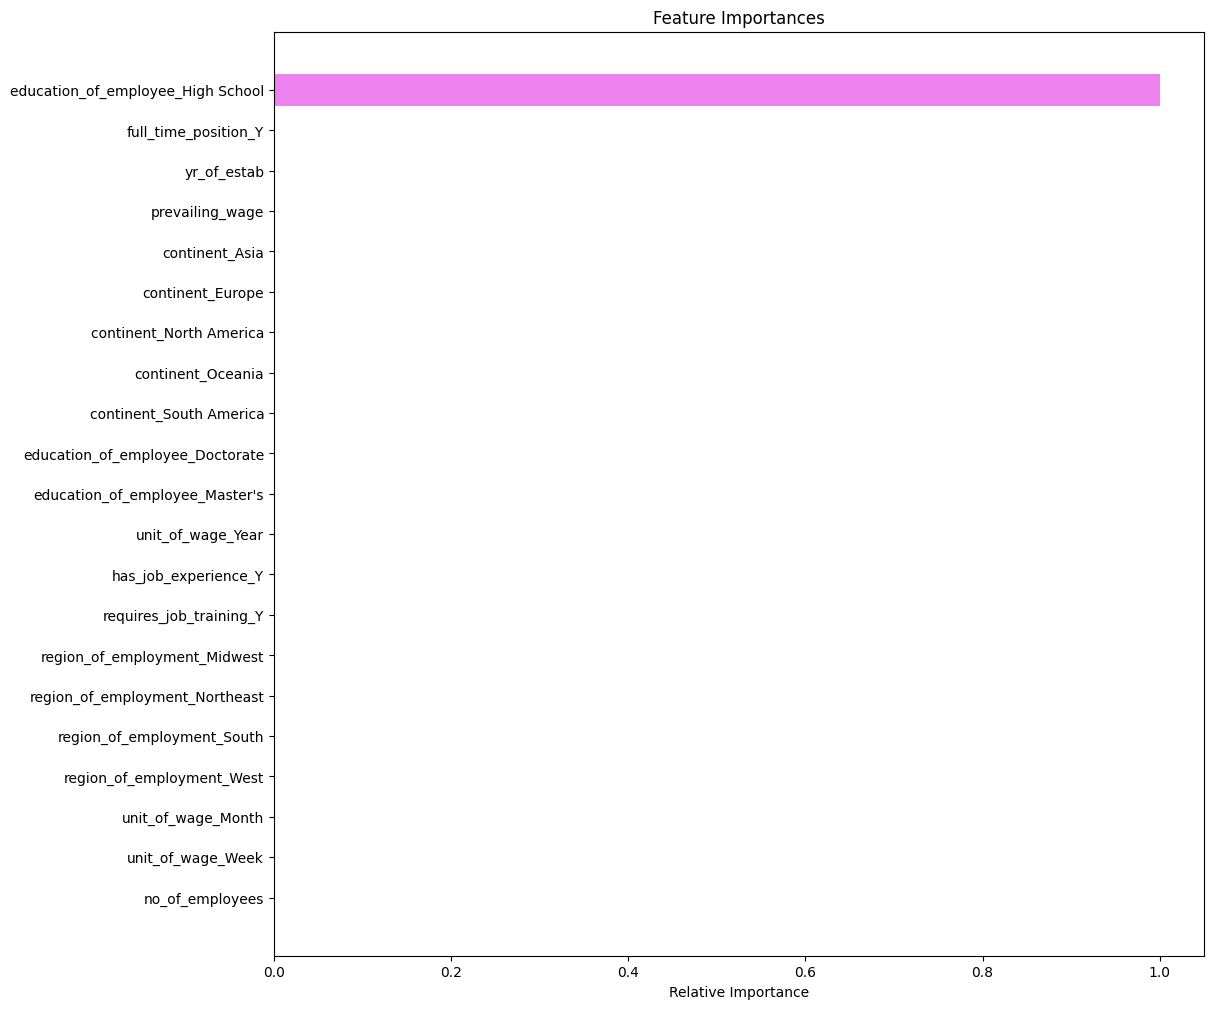

In [76]:
feature_names = X_train.columns
importances = tuned_adb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**

From the Feature importance graph we can come to the conclusion that below are the variables which needs to be looked on

*   education_of_employee


## Actionable Insights and Recommendations

**Business Insights:**

1. **Higher Education and Approval:**

*   Doctorate and Master's degree holders have better chances of approval
*   High School graduates face greater denial risks.

2. **Continent-Specific Trends:**

*   Europe and Africa yield high approval rates.
*   South America has the highest denial rate, with Asia in the middle.

3. **Work Experience**

*   Applicants with prior job experience are significantly more likely to be approved.

4. **Prevailing Wages:**

*   Higher prevailing wages improve chances of approval, hinting that salary level plays a pivotal role.

5. **Wage Unit Preference:**

*   Yearly wage contracts correlate with higher certification rates, while hourly wages are more prone to denial.

6. **Regional Employment Trends:**

*   Midwest and Island regions of the U.S. offer higher prevailing wages than others, presenting potential opportunities.


**Recommendations:**

1. **Focus on Higher Education and Experience:**

Actively recruit candidates with advanced degrees and professional experience. Streamline the process for these applicants to attract high-quality talent.

2. **Expand Outreach to Europe and Africa:**

Prioritize applications from regions with higher approval rates, such as Europe and Africa. Develop region-specific strategies to encourage applicants from these areas.

3. **Advocate Yearly Wage Contracts:**

Educate employers on the benefits of offering yearly wage contracts, as they are linked to higher approval rates. Provide tools or incentives to standardize this practice.

4. **Leverage High-Wage Regions:**

Direct resources toward the Midwest and Island regions of the U.S., where prevailing wages are higher. These regions may attract skilled workers who contribute more significantly to visa certification success.

5. **Enhance Transparency and Communication:**

Maintain regular, clear updates with applicants to improve their experience. Transparency will build trust and enhance EasyVisa's reputation.

<font size=6 color='blue'>Power Ahead</font>
___